# ASSIGNMENT 2
Author: Mostafa Abdelazim, 
ID: 900203676

Abstract: The code aims analyze the confidence intervals for 2 data sets. The first one is for matches, and their win/lose probability for different reasons, like home/away or friendly/official matches. The second data set is for reported covid cases in all countries in 20202 and 2021. In both data sets, all the analyzed data are given and graphed throughout the code. 

# Part 1

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
df=pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [3]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [4]:
values= ['win','lose','draw']

In [5]:
df['result'] = np.select(conditions, values)

In [6]:
x=df['result'].value_counts()

In [7]:
x=np.array(x)

In [8]:
x

array([21009, 12224,  9955], dtype=int64)

In [9]:
conditions = [
    (df['tournament']=='Friendly'),
    (df['tournament']!='Friendly')
    ]

In [10]:
values=['Friendly','Official']

In [11]:
df['typematch'] = np.select(conditions, values)

In [12]:
x=pd.crosstab(df['typematch'],df['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,4329,8141,4806,17276
Official,5626,12868,7418,25912
All,9955,21009,12224,43188


In [13]:
x=np.array(x)
x

array([[ 4329,  8141,  4806, 17276],
       [ 5626, 12868,  7418, 25912],
       [ 9955, 21009, 12224, 43188]], dtype=int64)

In [14]:
CI_win_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_win_friendly

(0.27150736589666685, 0.2848714254902283)

In [15]:
CI_win_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_win_official

(0.2807729187467606, 0.29178033843138085)

In [16]:
ci_win = {}
ci_win['Typematch'] = ['Friendly','Official']
ci_win['lb'] = [CI_win_friendly[0],CI_win_official[0]]
ci_win['ub'] = [CI_win_friendly[1],CI_win_official[1]]
df_ci3= pd.DataFrame(ci_win)
df_ci3

,Typematch,lb,ub
0,Friendly,0.271507,0.284871
1,Official,0.280773,0.291780


([<matplotlib.axis.YTick at 0x1c7bb5d26a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

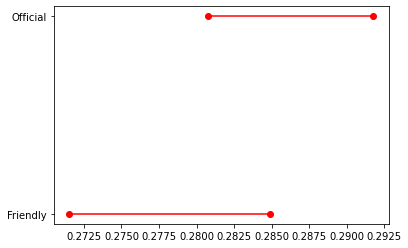

In [17]:
for lb,ub,y in zip(df_ci3['lb'],df_ci3['ub'],range(len(df_ci3))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci3)),list(df_ci3['Typematch']))

In [18]:
CI_lose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_lose_friendly

(0.46378827932197364, 0.47867525390331)

In [19]:
CI_lose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_lose_official

(0.4905161288707065, 0.5026916513083611)

In [20]:
ci_lose = {}
ci_lose['Typematch'] = ['Friendly','Official']
ci_lose['lb'] = [CI_lose_friendly[0],CI_lose_official[0]]
ci_lose['ub'] = [CI_lose_friendly[1],CI_lose_official[1]]
df_ci4= pd.DataFrame(ci_lose)
df_ci4

,Typematch,lb,ub
0,Friendly,0.463788,0.478675
1,Official,0.490516,0.502692


([<matplotlib.axis.YTick at 0x1c7bd635a30>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

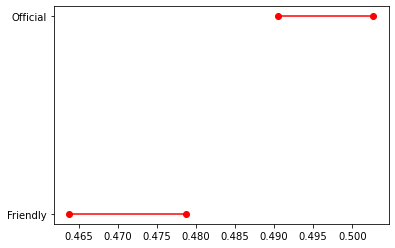

In [21]:
for lb,ub,y in zip(df_ci4['lb'],df_ci4['ub'],range(len(df_ci4))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci4)),list(df_ci4['Typematch']))

In [22]:
df['country'].value_counts()

United States          1237
France                  818
Malaysia                744
England                 717
Sweden                  655
                       ... 
Belgian Congo             1
Portuguese Guinea         1
Bohemia and Moravia       1
Lautoka                   1
Mali Federation           1
Name: country, Length: 267, dtype: int64

In [23]:
dfus=df[df['country']=='United States']

In [24]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]

In [25]:
values=['Friendly','Official']

In [26]:
dfus['Typematch'] = np.select(conditions, values)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_17240/327193532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['Typematch'] = np.select(conditions, values)


In [27]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [28]:
x=np.array(x)
x

array([[ 180,  247,  226,  653],
       [ 114,  315,  155,  584],
       [ 294,  562,  381, 1237]], dtype=int64)

In [29]:
CI_uswin_friendly=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_friendly

(0.22959939266607973, 0.30122252514213943)

In [30]:
CI_uswin_official=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_official

(0.3096072474351973, 0.38258264536725295)

In [31]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_cius= pd.DataFrame(ci_uswin)
df_cius

,Typematch,lb,ub
0,Friendly,0.229599,0.301223
1,Official,0.309607,0.382583


([<matplotlib.axis.YTick at 0x1c7bd67ca90>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

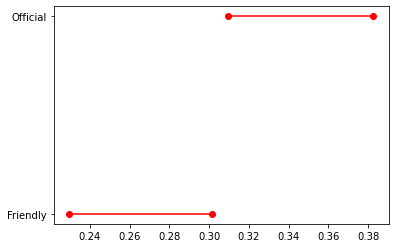

In [32]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [33]:
CI_uslose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_friendly

(0.3410587617395715, 0.4154496609250533)

In [34]:
CI_uslose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_official

(0.4989576113893054, 0.5798095118983658)

In [35]:
ci_uslose = {}
ci_uslose['Typematch'] = ['Friendly','Official']
ci_uslose['lb'] = [CI_uslose_friendly[0],CI_uslose_official[0]]
ci_uslose['ub'] = [CI_uslose_friendly[1],CI_uslose_official[1]]
df_cius= pd.DataFrame(ci_uslose)
df_cius

,Typematch,lb,ub
0,Friendly,0.341059,0.41545
1,Official,0.498958,0.57981


([<matplotlib.axis.YTick at 0x1c7bbb118e0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

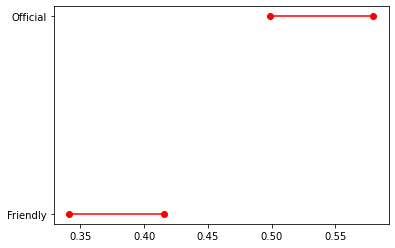

In [36]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

# Conclusion for Part 1
The code aims to find the 95% confidence interval for won/lost matches for both match types, Friendly and Official. The first 2 confidence intervals were for won/lost matches in friendly and offical matches for all countries in general without choosing a specific one. The confidence interval for winning in both both matches types were totally different. The range of the interval for winning an official match is less than a friendly match. Which led to a high margin of error  for winning a friendly match, and the propability of winning a friendly match is high than winning an official match. Moreover, for losing, it's the same thing. The probability of losing a match is higher in friendly matches and the MOE is also bigger. The first 2 confidence intervals were for won/lost matches in friendly and offical matches for the most common country, United States. The range of the interval for winning an official match is more than a friendly match. Which led to a high margin of error  for winning an official match, and the propability of winning an official match is higher than winning a friendly match. Moreover,for losing, it's the same thing. The probability of losing a match is higher in official matches and the MOE is also bigger.

# Part 2

In [37]:
df1=pd.read_csv('covid_data.csv',encoding='latin-1')
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [38]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df1['month'] = df1['month'].astype(cat_type)

In [39]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error


def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [40]:
df1['date'][0]

df1['date'] = pd. to_datetime(df1['date'],format='%Y-%m-%d')

df1['date'][0]

df1['year'] = pd. DatetimeIndex(df1['date']). year

df1['year'][0]


2020

In [41]:
ratio=df1['dcases']/df1['ddeaths']

df1['ratio']=ratio

df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,ratio
28,2020-03-23,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Mon,Mar,2020,6.000000
31,2020-03-26,AFG,Afghanistan,Low income,South Asia,Asia,6,1,38041754,Thu,Mar,2020,6.000000
34,2020-03-29,AFG,Afghanistan,Low income,South Asia,Asia,8,2,38041754,Sun,Mar,2020,4.000000
39,2020-04-03,AFG,Afghanistan,Low income,South Asia,Asia,34,1,38041754,Fri,Apr,2020,34.000000
41,2020-04-05,AFG,Afghanistan,Low income,South Asia,Asia,29,2,38041754,Sun,Apr,2020,14.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122837,2021-12-26,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,605,6,14645468,Sun,Dec,2021,100.833333
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021,64.588235
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021,65.593750
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021,73.333333


In [42]:
cy=df1.groupby(['continent','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

cy=cy.reset_index()

cy= pd.DataFrame(cy)

cy

continent  year       ratio                                 \
                                          mean         std   size   get_ci_lb   
0                     Africa  2020   52.623736   62.672790   4892   50.867061   
1                     Africa  2021   75.063308  206.868302   8449   70.651652   
2                       Asia  2020  106.957897  157.389473   7393  103.369632   
3                       Asia  2021  126.452824  195.776606  12025  122.953291   
4                     Europe  2020   85.172982  158.693265   8597   81.817969   
5                     Europe  2021  165.387291  524.748437  11756  155.900613   
6   North America(continent)  2020   58.520703   84.557767   2924   55.454557   
7   North America(continent)  2021   85.684798  126.416057   4606   82.033036   
8                    Oceania  2020   39.919436   69.552255    170   29.388766   
9                    Oceania  2021  194.977007  366.457359    381  158.062720   
10  South America(continent)  2020   46.966987   56.138845   2644   44.826169   
11  South America(continent)  2021   60.432168   92.791185   3936   57.532416   

                
     get_ci_ub  
0    54.380410  
1    79.474964  
2   110.546162  
3   129.952357  
4    88.527996  
5   174.873970  
6    61.586848  
7    89.336561  
8    50.450106  
9   231.891293  
10   49.107805  
11   63.331920

In [43]:
ry=df1.groupby(['region','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

ry=ry.reset_index()

ry= pd.DataFrame(ry)

ry

region  year       ratio                     \
                                            mean         std   size   
0          East Asia & Pacific  2020   83.567307  154.946570   1798   
1          East Asia & Pacific  2021  158.944043  266.651870   3834   
2        Europe & Central Asia  2020   85.533757  155.144980   9958   
3        Europe & Central Asia  2021  154.876803  485.184235  13977   
4    Latin America & Caribbean  2020   51.769371   74.371591   4970   
5    Latin America & Caribbean  2021   68.812508  106.545737   7815   
6   Middle East & North Africa  2020  110.395171  162.071844   4225   
7   Middle East & North Africa  2021  117.932518  181.088283   5980   
8        North America(region)  2020   63.547620   55.760176    598   
9        North America(region)  2021  130.337613  155.721731    727   
10                  South Asia  2020   84.544853   93.638844   1375   
11                  South Asia  2021   73.658405   80.526434   2161   
12          Sub-Saharan Africa  2020   54.795871   67.315740   3696   
13          Sub-Saharan Africa  2021   80.322500  227.180471   6659   

                            
     get_ci_lb   get_ci_ub  
0    76.400465   90.734149  
1   150.500906  167.387180  
2    82.486195   88.581319  
3   146.832556  162.921050  
4    49.701217   53.837524  
5    66.449926   71.175090  
6   105.506770  115.283571  
7   113.341851  122.523185  
8    59.069425   68.025815  
9   118.999136  141.676090  
10   79.591086   89.498619  
11   70.261350   77.055460  
12   52.624965   56.966777  
13   74.865002   85.779997

In [44]:
iy=df1.groupby(['income','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

iy=iy.reset_index()

iy= pd.DataFrame(iy)

iy

income  year       ratio                                 \
                                    mean         std   size   get_ci_lb   
0          High income  2020  110.071092  184.041271   9477  106.365280   
1          High income  2021  198.575163  510.705591  13416  189.932524   
2           Low income  2020   51.368931   75.219109   2388   48.350513   
3           Low income  2021   55.006252  105.314757   4058   51.765014   
4  Lower middle income  2020   59.430011   65.567399   5894   57.755761   
5  Lower middle income  2021   79.194789  158.801813   9668   76.028944   
6  Upper middle income  2020   63.920043   99.381190   8861   61.850520   
7  Upper middle income  2021   82.289241  159.718291  14011   79.644363   

               
    get_ci_ub  
0  113.776903  
1  207.217802  
2   54.387349  
3   58.247489  
4   61.104260  
5   82.360633  
6   65.989566  
7   84.934119

In [45]:
cy20=cy[(cy['year']==2020)]
cy21=cy[(cy['year']==2021)]

cy20.columns
cy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
cy21.columns
cy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Continents 2020')

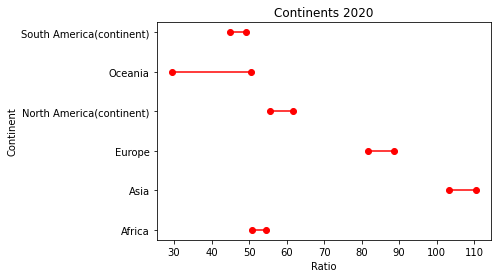

In [46]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cy20['get_ci_lb'],cy20['get_ci_ub'],range(len(cy))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cy20)),list(cy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents 2020")

Text(0.5, 1.0, 'Continents 2021')

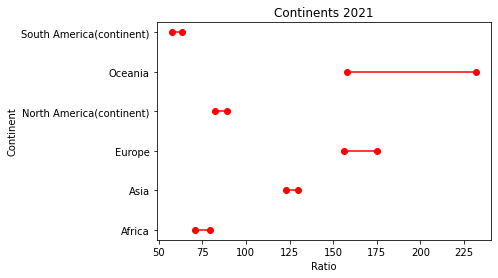

In [47]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cy21['get_ci_lb'],cy21['get_ci_ub'],range(len(cy))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cy21)),list(cy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents 2021")

In [48]:
ry20=ry[(ry['year']==2020)]
ry21=ry[(ry['year']==2021)]

ry20.columns
ry20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
ry21.columns
ry21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Regions 2020')

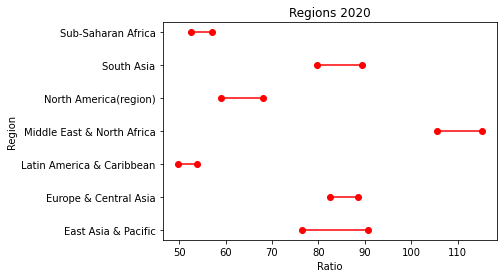

In [49]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(ry20['get_ci_lb'],ry20['get_ci_ub'],range(len(ry20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(ry20)),list(ry20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions 2020")

Text(0.5, 1.0, 'Regions 2021')

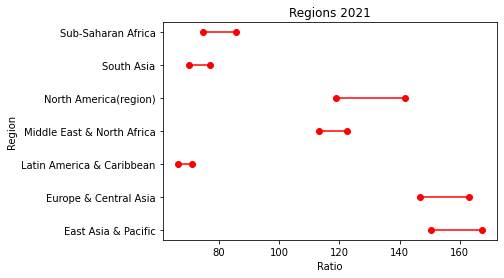

In [50]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(ry21['get_ci_lb'],ry21['get_ci_ub'],range(len(ry21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(ry21)),list(ry21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions 2021")

In [51]:
iy20=iy[(iy['year']==2020)]
iy21=iy[(iy['year']==2021)]

iy20.columns
iy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
iy21.columns
iy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Income 2020')

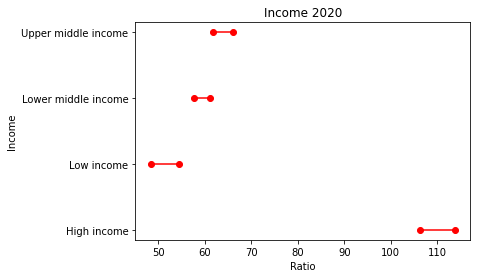

In [52]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(iy20['get_ci_lb'],iy20['get_ci_ub'],range(len(iy20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(iy20)),list(iy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income 2020")

Text(0.5, 1.0, 'Income 2021')

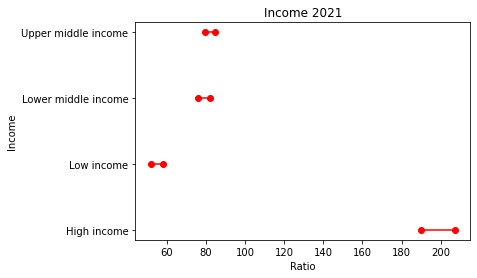

In [54]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(iy21['get_ci_lb'],iy21['get_ci_ub'],range(len(iy21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(iy21)),list(iy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income 2021")

# Conclusion for Part 2
This code aims to analyze the ratio between cases and deaths in 2020 and 2021, and compare them with respect to 3 aspects, continent, region, and income. Throughout all the aspects, the ratio in 2020 is below 120 for all parts in the graph. While in 2021, the ratio increases in all aspects and the parts within them.